# Лабораторная работа 6

## Цифровое гетеродинирование

## Задачи и порядок выполнения работы

1. Получить массив отсчётов исходного сигнала из заранее подготовленного звукового WAV-файла с записанным тональным сигналом со значением частоты в диапазоне от 10 кГц до 15 кГц.
2. Построить графики звукового сигнала во временной и частотной области.
3. С помощью метода гетеродинирования модифицировать сигнал переносом его частоты в диапазон от 500 Гц до 5500 Гц.
4. Построить графики звукового сигнала во временной и частотной области.
5. Записать полученный сигнал в новый WAV-файл. Прослушать полученный файл средствами операционной системы и сравнить с исходным.

#### 1. Получить массив отсчётов исходного сигнала из заранее подготовленного звукового WAV-файла с записанным тональным сигналом со значением частоты в диапазоне от 10 кГц до 15 кГц.

In [13]:
import numpy as np
from librosa import load
from soundfile import write
from IPython.display import Audio

duration = 1.0
'Продолжительность сигнала'
freq = 14000.0
'Частота сигнала'
sampling_rate = 44100
'Частота дискретизации'

time = np.linspace(0, duration, int(duration * sampling_rate))

signal = np.sin(2.0 * np.pi * freq * time)

write('14khz.wav', signal, samplerate=sampling_rate)

(signal, sampling_rate) = load('14khz.wav', sr=sampling_rate)
Audio('14khz.wav')

#### 2. Построить графики звукового сигнала во временной и частотной области.

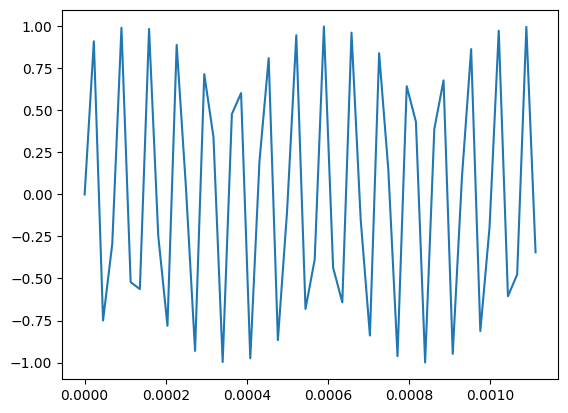

In [31]:
import matplotlib.pyplot as plt

plt.plot(time[:50], signal[:50])

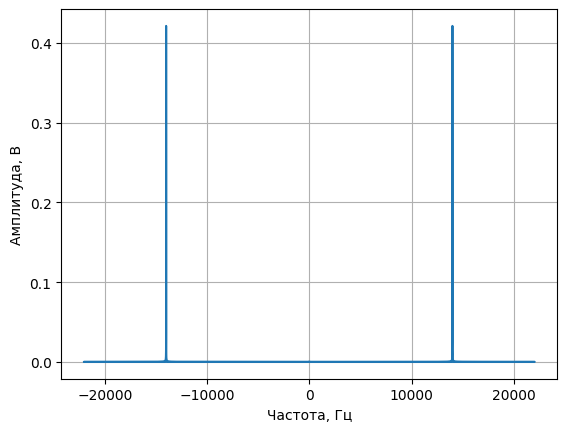

In [32]:
from scipy.fft import fft, fftfreq

def freq_plot(data: np.ndarray):
    sp = fft(data)
    length = len(data)
    freq = fftfreq(length, 1 / sampling_rate)
    plt.plot(freq, np.abs(sp / length))
    plt.grid()
    plt.xlabel('Частота, Гц')
    plt.ylabel('Амплитуда, В')

freq_plot(signal)

#### 3. С помощью метода гетеродинирования модифицировать сигнал переносом его частоты в диапазон от 500 Гц до 5500 Гц.

In [36]:
osc_frequency = 10000.0
'Частота гетеродина'

osc_signal = np.sin(2.0 * np.pi * osc_frequency * time)
'Сигнал гетеродина'

heterodynes = signal * osc_signal
'Два спектра со смещением на частоту гетеродина'


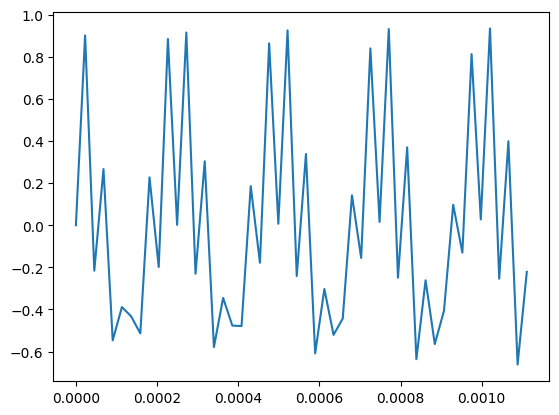

In [49]:
plt.plot(time[:50], heterodynes[:50])

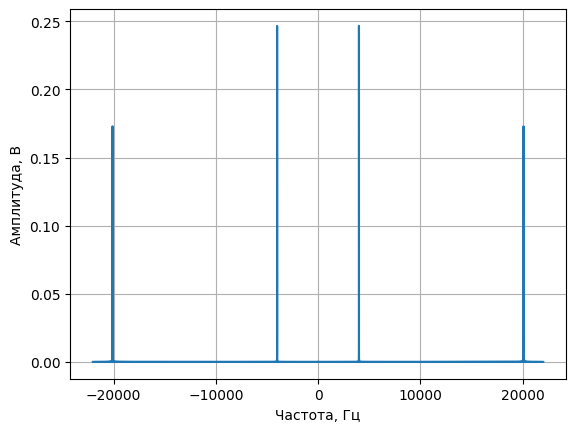

In [38]:
freq_plot(heterodynes)

Теперь нам нужен ФНЧ, воспользуемся уже знакомым методом по созданию КИХ фильтра

![](online_redactor.png)

In [40]:
from coefficients import h

filtered_signal = np.convolve(heterodynes, h)

#### 4. Построить графики звукового сигнала во временной и частотной области.

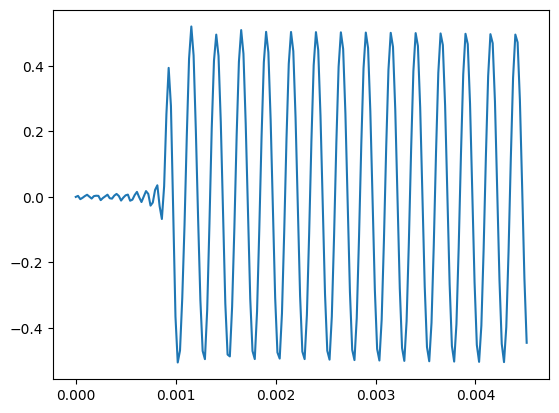

In [42]:
plt.plot(time[:200], filtered_signal[:200])

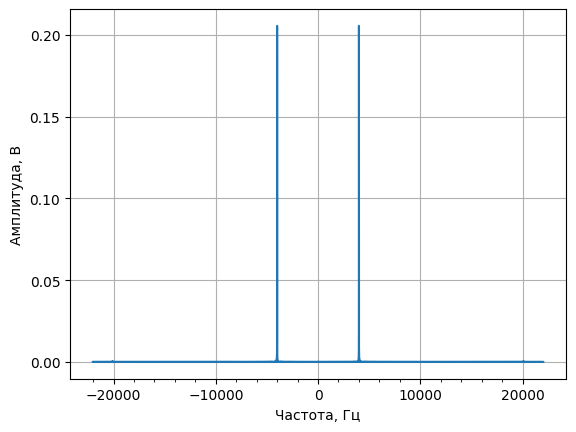

In [48]:
plt.xticks(np.arange(-22000.0, 22000.0, 2000.0), minor=True)
freq_plot(filtered_signal)

#### 5. Записать полученный сигнал в новый WAV-файл. Прослушать полученный файл средствами операционной системы и сравнить с исходным.

In [51]:
write('filtered_signal.wav', filtered_signal, samplerate=sampling_rate)

Audio('filtered_signal.wav')

## Контрольные вопросы

#### 1. Что такое гетеродинирование?

Гетеродинирование — это преобразование сигнала одной частоты в пару
сигналов с разными частотами (промежуточные частоты) с сохранением фазы
исходного сигнала.

#### 2. Приведите пример практического применения гетеродинирования.

Понижение частоты принимаемых радиосигналов для последующей обработки.

#### 3. Почему при переносе частоты сигнала методом гетеродинирования необходимо дополнительно применять фильтр?

Потому что в процессе гетеродирования получаются два сигнала, перенесенные вверх и вниз, одновременно. Обычно нам нужна только один из них, поэтому другой мы отфильтровываем

#### 4. Как выбрать величину частоты гетеродина?

Нужно оценить диапазон исходного сигнала и подобрать частоту так, чтобы нижняя граница диапазона опустилась почти(но не совсем) до нуля, например до 500 Гц